In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('newhousing.csv')

In [7]:
df.KitchenQual.unique()

array([4, 2, 0, 1, 3], dtype=int64)

In [12]:
df.KitchenQual.head()

0    4
1    2
2    2
3    4
4    2
Name: KitchenQual, dtype: int64

In [5]:
df

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Partial,SaleCondition_MISSING,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_MISSING,LandSlope_Mod,LandSlope_Sev,LandSlope_MISSING,Baths
0,856,126000,30,0.0,7890,6,6,1939,1950,0.0,...,0,0,0,0,1,0,0,0,0,2.0
1,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,...,0,0,0,0,1,0,0,0,0,3.0
2,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,...,0,0,0,0,1,0,0,0,0,1.0
3,1039,114000,70,80.0,8146,4,8,1900,2003,0.0,...,0,0,0,0,1,0,0,0,0,1.0
4,1665,227000,60,70.0,8400,8,6,2001,2001,0.0,...,0,0,0,0,1,0,0,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,121000,30,0.0,8854,6,6,1916,1950,0.0,...,0,0,0,0,1,0,0,0,0,1.0
2576,1733,139600,20,0.0,13680,3,5,1955,1955,0.0,...,0,0,0,0,0,0,0,0,0,2.0
2577,2002,145000,90,82.0,6270,5,6,1949,1950,0.0,...,0,0,0,0,1,0,0,0,0,2.0
2578,1842,217500,60,0.0,8826,7,5,2000,2000,144.0,...,0,0,0,0,1,0,0,0,0,3.5


In [6]:
X = df.loc[:, df.columns != 'SalePrice']
y = df['SalePrice']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

R^2 for train set: 0.927127
--------------------------------------------------
R^2 for test  set: -6324787.485919
--------------------------------------------------
RSS is equal to 59032631609198886912.000


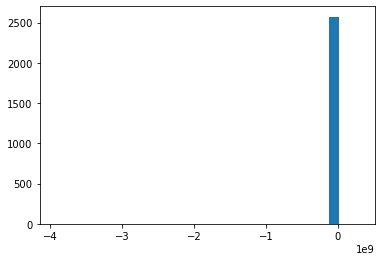

In [9]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train,y_train)
residuals = y - ols.predict(X)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))
print('-'*50)

residuals = y - ols.predict(X)
print('RSS is equal to %.3f' %np.sum((residuals))**2)


_=plt.hist(residuals, bins=30)

In [10]:
import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(np.log(y), x)
results = model.fit()
print(results.summary()) # How to print out the summary report

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     172.7
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:29:20   Log-Likelihood:                 2343.2
No. Observations:                2580   AIC:                            -4278.
Df Residuals:                    2376   BIC:                            -3084.
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.82

In [12]:
pValues = results.pvalue
print('The insignificant coefficients')
pValues[pValues>=0.05]

AttributeError: 'OLSResults' object has no attribute 'pvalue'

In [13]:
s
print('The significant coefficients')
pValues[pValues<0.05]

NameError: name 's' is not defined

## Detecting Multicollinearity 

In [26]:
df.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Baths',
       'MSZoning_E', 'LotShape_E', 'LandContour_E', 'LandSlope_E',
       'RoofStyle_E', 'ExterQual_E', 'ExterCond_E', 'BsmtQual_E', 'BsmtCond_E',
       'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E',
       'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E',
       'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'Fence_E'],
      dtype='object')

In [27]:
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in use_cols:
                df2     = df.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)  

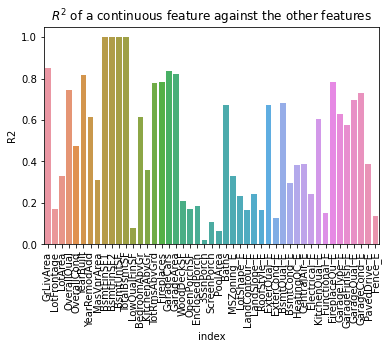

In [28]:
features = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

for item in features.get_xticklabels():
    item.set_rotation(90)